# Basic imports

In [24]:
from functools import partial
import pandas, csv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import roc_curve, auc, hamming_loss, zero_one_loss, \
    jaccard_similarity_score, precision_score, recall_score, roc_auc_score, make_scorer
from sklearn.cross_validation import StratifiedKFold as SKF, cross_val_score, KFold
from sklearn import cross_validation
from scipy.special import expit
from sklearn.multiclass import OneVsRestClassifier
import numpy

# Real data

Results in X, Y

In [2]:
dataPath = "../data/"

# reading CSV file
reader = csv.reader(open(dataPath + 'features_2.csv', 'r'), delimiter=',')
data_full = np.array(list(reader))
reader = csv.reader(open(dataPath + 'all_endpoints_with_missing_values_012615.csv', 'r'), delimiter=',')
activity_full = np.array(list(reader))
badValue = 999

In [3]:
# feature names
feature_names = data_full[0, 1:]

# names of the proteins
protein_names = data_full[1:, 0]
protein_names1 = activity_full[1:, 0]
print 'Protein names equality check:', np.array_equal(protein_names1, protein_names)

# names of receptors
receptor_names = activity_full[0, 1:]

# Object-Feature matrix (proteins description)
X = data_full[1:, 1:].astype('double')

# Activity matrix
Y = activity_full[1:, 1:].astype('int16')

# Removing constant features
ind = np.var(X, axis = 0) != 0
X = X[:, ind]
feature_names = feature_names[ind]

# Number of features
N = X.shape[1]

# Normalization
df = pandas.DataFrame(X)
df_norm = (df - df.mean()) / (df.max() - df.min())
X = np.copy(df_norm.as_matrix())

Protein names equality check: True


In [4]:
print receptor_names

['NR-AhR' 'NR-AR-LBD' 'NR-AR' 'SR-MMP' 'NR-ER' 'SR-HSE' 'SR-p53'
 'NR-PPAR-gamma' 'SR-ARE' 'NR-Aromatase' 'SR-ATAD5' 'NR-ER-LBD']


In [5]:
df = pandas.DataFrame(X)

AttributeError: 'NoneType' object has no attribute 'is_bbox'

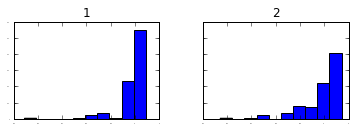

In [125]:
fig, ax = plt.subplots()
lout=2
ax1 = df.hist(xlabelsize=0,ylabelsize=0, figsize=(15, 15), layout=(lout,lout),sharey=True, column=[1,2],ax=ax,grid=False)
#fig.savefig("a.svg", bbox_inches = 'tight')
#ax1.grid(b=False)
fig.tight_layout()
for x in range(lout):
    for y in range(lout):
        ax1[x][y].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='off') # labels along the bottom edge are off
        ax1[x][y].tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            left='off',      # ticks along the bottom edge are off
            right='off',         # ticks along the top edge are off
            labelbottom='off') # labels along the bottom edge are off
        ax1[x][y].get_xaxis().set_visible(False)
        ax1[x][y].get_yaxis().set_visible(False)
        ax1[x][y].axis('off')
        ax1[x][y].set_axis_off()
        
fig.show()

In [120]:
fig.savefig("sdf.png")

In [118]:
fig.savefig("RealDataDistr.svg", bbox_inches = 'tight')

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
res = {}
for i in range(X.shape[1]):
    res[i] = variance_inflation_factor(X, i)
    print i

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164


In [16]:
res

{0: 388.32369431051688,
 1: 31.864092924157728,
 2: 43.638062670902407,
 3: 340.86278926876787,
 4: 154.00350099764771,
 5: 6172.00364483267,
 6: 20.264713668616459,
 7: 444.17328693321429,
 8: 422.99471126809368,
 9: 53.18526650327123,
 10: 92.375473546282052,
 11: 394.99595624907516,
 12: 32.513776402358829,
 13: 42.537738990843955,
 14: 54.535943420766884,
 15: 58.022167682575585,
 16: 485.0253124188983,
 17: 80.340560373140036,
 18: 95.120957368002792,
 19: 377.24947769740118,
 20: 6.0815827349769904,
 21: 13.817330188218669,
 22: 21.822014180128512,
 23: 1532.115733594645,
 24: 7.8955732435445283,
 25: 14.850107592080715,
 26: 21.267237067666809,
 27: 592.53461389186339,
 28: 10.449112841961254,
 29: 20.705662045069147,
 30: 34.749848061593774,
 31: 2117.0065469509263,
 32: 1824.2606349602836,
 33: 57765236.873090565,
 34: 22431034.585935231,
 35: 22.511426488423055,
 36: 766615.11487193534,
 37: 202.39419359619549,
 38: 69.414891239379699,
 39: 4387989.6010332769,
 40: 9530117.21

In [24]:
arr = []
for a in sorted(res):
    arr.append(res[a])
arr = np.array(arr)

In [26]:
np.argsort(arr)

array([ 52,  78, 110,  79, 113,  20, 111,  24,  28, 136, 116,  21, 135,
        25,  71,  75,   6,  29,  26,  22,  35, 124, 164, 123, 161,   1,
        12, 122,  30, 134,  13,   2,   9,  14, 133,  15, 128,  38, 119,
        17, 115,  10,  43,  18, 129,  56, 131, 130, 140,   4,  37, 160,
         3, 121,  19, 109,   0,  11,   8,   7, 118,  16,  72,  27, 120,
       132, 114,  23,  42,  32, 126,  45,  31,  64, 138,  73,  57, 139,
       112, 151,   5,  49,  70,  76,  77,  61, 117,  65,  90, 137,  74,
        68,  97,  59,  86,  85,  47,  81,  54, 105, 103, 147,  60, 141,
       150, 163, 157,  83,  36, 148,  96,  93,  84,  82, 108, 144, 156,
        89, 102,  94, 143,  53,  51,  50, 155,  41,  91,  39,  88, 146,
       154,  63, 100, 142,  99, 149,  40,  80,  69,  98,  55,  44,  46,
        58,  62,  34,  87, 159, 158,  48, 162, 125,  66,  33, 153,  92,
       145, 106, 107, 104,  67, 152, 101, 127,  95])

In [40]:
arr1 = 1 - 1 / arr

In [45]:
df = pandas.DataFrame(arr1)
df[0] = "R^2"

In [52]:
numpy.histogram(arr1, bins = 100)

(array([  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          2,   0,   0,   0,   0,   1,   1,   1,   0,   1,   2,   0,   1,
          3,   3,   3,   4,   2,   5,   5,  10, 115]),
 array([ 0.40423657,  0.4101942 ,  0.41615184,  0.42210947,  0.42806711,
         0.43402474,  0.43998238,  0.44594001,  0.45189764,  0.45785528,
         0.46381291,  0.46977055,  0.47572818,  0.48168582,  0.48764345,
         0.49360108,  0.49955872,  0.50551635,  0.51147399,  0.51743162,
         0.52338926,  0.52934689,  0.53530452,  0.54126216,  0.54721979,
         0.55317743,  0.55913506,  0.5650927 ,  0.57105033,  0.577007

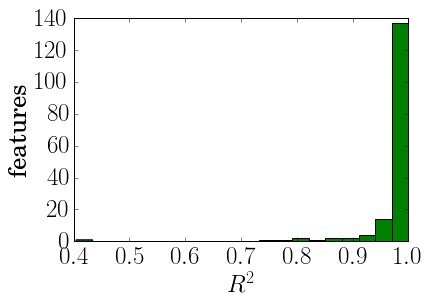

In [66]:
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    params = {'text.usetex' : True,
       'font.size' : 25,
#          'font.family' : 'lmodern',
       'text.latex.unicode': True}
    plt.rcParams.update(params)
params={}
plt.rcParams.update(params)
plt.hist(arr1, 20, normed=0, facecolor='green', alpha=1)
plt.xlabel(r'$R^2$', fontsize=25)
plt.ylabel(r'features', fontsize=25)
#plt.ylim([0,1])
#plt.xlim([1,50])
plt.tick_params(axis='both', which='major')
plt.savefig("RealDataVIF.eps", bbox_inches = 'tight')
plt.show()


In [101]:
params={'text.usetex' : False,
       'font.size' : 0,
#          'font.family' : 'lmodern',
       'text.latex.unicode': True}
plt.rcParams.update(params)